In [1]:
import pandas as pd
import time

In [2]:
data = pd.read_excel('benchmark.xlsx')
data.index = data["ID"]
data = data.drop("ID", axis=1)
data.head()

,text,target
ID,,
LOG4J2-121,The Syslog appender requires the format parame...,101
LOG4J2-1607,[Performance testing|https://issues.apache.org...,1010
LOG4J2-1401,Use case:\n\nWe have a low-garbage trading sys...,1010
LOG4J2-1020,The class {{org.apache.logging.log4j.core.appe...,1019
LOG4J2-239,RollingFileAppender currently requires a fileN...,1027


In [3]:
len(data)

334

In [4]:
print(data['target'].value_counts())

1681           4
1516           4
442            4
812            4
392            3
435            3
1685           3
293            3
2031           3
829            3
1636           3
578            3
1637           3
323            3
763            2
1511           2
569            2
329            2
506            2
1125           2
1501           2
1121           2
1397           2
542            2
41             2
1898           2
496            2
471            2
1660           2
494            2
              ..
1191           1
154            1
1707           1
1334           1
1754           1
519            1
1145           1
745            1
1818           1
1554           1
439            1
84             1
WICKET-6046    1
1350           1
KARAF-5354     1
1447           1
1914           1
1246           1
1708           1
1534           1
598            1
1916           1
648            1
1442           1
93             1
1841           1
CSV-182        1
181           

In [5]:
#cleaning sheet
import numpy as np
#To remove cells which has short descriptions (Requirements?)
for index, row in data.iterrows():
    if(len(str(row.iloc[0]))<50):
        data = data.replace(row, np.nan)
data = data.dropna()
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,text,target
ID,,
LOG4J2-1285,See https://github.com/LMAX-Exchange/disruptor...,1261
LOG4J2-877,I have RollingFile Appender defined like \n\n{...,829
LOG4J2-1353,The Logger.warn/info/trace etc. has methods th...,1342
LOG4J2-1061,Passing {{null}} to {{Log4jMarker#remove(Marke...,1060
LOG4J2-1705,"Similar to LOG4J2-1181 for Scala, provide a Ko...",INFRA-12916


In [6]:
print("length:",len(data))
print(data['target'].value_counts())

length: 320
1516           4
812            4
442            4
435            3
2031           3
392            3
293            3
1637           3
1685           3
323            3
578            3
829            3
763            2
329            2
1501           2
569            2
539            2
1125           2
1539           2
1121           2
1397           2
703            2
1010           2
1060           2
1407           2
506            2
250            2
542            2
41             2
496            2
              ..
926            1
1707           1
1447           1
1334           1
1754           1
519            1
1179           1
745            1
512            1
1554           1
439            1
84             1
WICKET-6046    1
1350           1
KARAF-5354     1
1914           1
577            1
1246           1
1708           1
1534           1
1916           1
648            1
1442           1
1841           1
CSV-182        1
181            1
1689           1
11

In [7]:
#Removing unique examples
for row in data.iterrows():
    seriesObj = data.apply(lambda x: True if row[1][1] == x[1] else False, axis=1)
    if len(seriesObj[seriesObj == True].index) <2:
        temp= data[seriesObj]
        for subrow in temp.iterrows():
            data=data.drop(subrow[0], axis=0)
data.head()

,text,target
ID,,
LOG4J2-877,I have RollingFile Appender defined like \n\n{...,829
LOG4J2-1061,Passing {{null}} to {{Log4jMarker#remove(Marke...,1060
LOG4J2-425,Thread local 'currentLogEvent' is not cleaned ...,323
LOG4J2-1447,"With each logging call, context map data is co...",1516
LOG4J2-457,We use log4j 2 for logging inside our J2EE app...,442


In [8]:
print(len(data))
print(data['target'].value_counts())

97
1516    4
812     4
442     4
829     3
2031    3
293     3
578     3
1685    3
1637    3
392     3
435     3
323     3
920     2
1952    2
471     2
329     2
1898    2
1125    2
1501    2
703     2
1660    2
1511    2
513     2
1121    2
1274    2
1397    2
539     2
2076    2
496     2
1539    2
41      2
494     2
1305    2
763     2
569     2
542     2
250     2
1407    2
506     2
1060    2
1010    2
Name: target, dtype: int64


In [10]:
#Spliting the data in train test for future use
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.1, shuffle=True)
print(len(test))
test.head()

10


,text,target
ID,,
LOG4J2-1867,Was following the link:\n\nhttp://logging.apac...,1952
LOG4J2-1629,For some applications like financial trading s...,1660
LOG4J2-359,I have Weblogic 12c running. My web-app is ver...,293
LOG4J2-1590,AbstractFilter should call vararg method from ...,1511
LOG4J2-1349,The current ThreadContext map and stack implem...,1516


In [11]:
## Pre processing
import re
import nltk
import spacy
nlp=spacy.load('en_core_web_sm')
#adding some stopwords to be removed
my_stopwords = []
my_stopwords.append("shall")
my_stopwords.append('system')
my_stopwords.append(u'-')
my_stopwords.append(':')
my_stopwords.append('.')
my_stopwords.append(')')
my_stopwords.append('_')
my_stopwords.append('-')
my_stopwords.append('‘')
my_stopwords.append("'")
my_stopwords.append('(')
my_stopwords.append(' ')
my_stopwords.append('/')
my_stopwords.append('"')
my_stopwords.append('=')
my_stopwords.append(',')
my_stopwords.append('’')
my_stopwords.append('•')
for stopword in my_stopwords:
    nlp.Defaults.stop_words.add(stopword)
    nlp.vocab[stopword].is_stop = True
docs= [nlp(item[1][0]) for item in data.iterrows()]
def lemmatize_sentence(sentence):
    doc=nlp(sentence)
    res_words = []
    for token in doc:
        if not token.is_stop:
            res_words.append(token.lemma_)
        #print(token.text,token.lemma_)
    return " ".join(res_words)
def preprocess(line, x):
    line = line.lower()
    line = re.sub('\s+', ' ', line) #remove double spacing
    line = line.replace('\t',' ')
    line = line.replace('\n',' ')
    line = line.replace('\r',' ')
    line = line.replace(',','')
    line = line.replace('-',' ')
    line=lemmatize_sentence(line)
    if(x==1):
        print(line)
    return line

/Users/a66as/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/Users/a66as/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance:

In [12]:
##Average words per issue after removal of stop-words
start_time = time.clock()

print (time.clock() - start_time, "seconds")
words=0
for row in data.iterrows():
    words+=(len(row[1][0].split())-1)
print('Total Words:', words, ', AVG:', (words)/len(data))

0.0001449999999998397 seconds
Total Words: 20270 , AVG: 208.96907216494844


/Users/a66as/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Users/a66as/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [13]:
# Applying the pre-processing functions on the training set
trnewdocs=[]
countdown=len(train)
for row in train.iterrows():
    if countdown%500==0:
        print('Remaining issues to process', countdown, "out of", len(train))
    countdown-=1
    trnewdocs.append(lemmatize_sentence(preprocess(str(row[1][0]),0)))
train['textp']=trnewdocs
train.head()

/Users/a66as/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,text,target,textp
ID,,,
LOG4J2-485,"During analysis of LOG4J2-471, I found the sam...",471,analysis log4j2 471 find issue happen asyncapp...
LOG4J2-702,"This is in trunk, svn commit 1608156\n\nLogger...",1121,trunk svn commit 1608156 loggerconfig#waitforc...
LOG4J2-755,"{code}\n<RollingFile name=""MyFile"" filename=""$...",829,"{ code } < rollingfile name=""myfile filename=""..."
LOG4J2-519,Please try out the attached [^Generate.java] t...,41,try attach [ ^generate.java ] tool provide fun...
LOG4J2-1292,"LOG4J2-1274 added the {{encode(LogEvent, ByteB...",1274,log4j2 1274 add { { encode(logevent bytebuffer...


In [14]:
# Applying the pre-processing functions on the test set
tstnewdocs=[]
countdown=len(test)
for row in test.iterrows():
    if countdown%500==0:
        print('Remaining issues to process', countdown, "out of", len(test))
    countdown-=1
    tstnewdocs.append(lemmatize_sentence(preprocess(str(row[1][0]),0)))
test['textp']=tstnewdocs
test.head()

/Users/a66as/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,text,target,textp
ID,,,
LOG4J2-1867,Was following the link:\n\nhttp://logging.apac...,1952,follow link http://logging.apache.org/log4j/2....
LOG4J2-1629,For some applications like financial trading s...,1660,application like financial trading highly inte...
LOG4J2-359,I have Weblogic 12c running. My web-app is ver...,293,weblogic 12c run web app version 2.5 follow sn...
LOG4J2-1590,AbstractFilter should call vararg method from ...,1511,abstractfilter vararg method method unroll par...
LOG4J2-1349,The current ThreadContext map and stack implem...,1516,current threadcontext map stack implementation...


In [16]:
len(test)
#######Switch to slides for textual Similarity

10

In [17]:
#JSI Similarity
def jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))
def rec_exist(rec, str3):
    if len(rec)==0:
        return False
    else:
        for item in rec:
            #print("STU",str(item[0]), str3,"STU")
            if str(item[1]) == str3:
                return item[2]
        return False
def rec_delete(rec, str4):
    if len(rec)==0:
        return False
    else:
        for item in rec:
            #print("STU",str(item[0]), str3,"STU")
            if str(item[1]) == str4:
                rec.remove(item)
                return True
        return False
# The bruteforce JSI recommender
reuse_data=[]
for row in test.iterrows():
    print(row[0], "-->", row[1][1])
    rec=[]
    for subrow in train.iterrows():
        if jaccard_sim(row[1][2], subrow[1][2]) >0.07:
            #print("|_Similar Case:",subrow[0],"is using",subrow[1][1],"with JSI",round(jaccard_sim(row[1][2], subrow[1][2]),2))
            rec_exist_call= rec_exist(rec, str(subrow[1][1]))
            if rec_exist_call==False:
                rec.append([subrow[0], subrow[1][1],jaccard_sim(row[1][2], subrow[1][2])])
            elif rec_exist_call<jaccard_sim(row[1][2], subrow[1][2]):
                rec_delete(rec, subrow[1][1])
                rec.append([subrow[0], subrow[1][1],jaccard_sim(row[1][2], subrow[1][2])])
    rec.sort(key=lambda x: x[2], reverse=True)
    reuse_data.append([row[0],row[1][1], rec])
    #print(rec)

LOG4J2-1867 --> 1952
LOG4J2-1629 --> 1660
LOG4J2-359 --> 293
LOG4J2-1590 --> 1511
LOG4J2-1349 --> 1516
LOG4J2-1567 --> 1511
LOG4J2-511 --> 392
LOG4J2-1176 --> 578
LOG4J2-1547 --> 1539
LOG4J2-1660 --> 1637


In [19]:
#accuracy based on if the ground truth is in recommended list based on comparison with all existing issues
top4=0
ex_match=0
for obj in reuse_data:
    print(obj[0],"-->",obj[1])
    if len(obj[2])>0:
        #print(obj[2])
        if obj[2][0][1]==obj[1]:
            ex_match+=1
    count=0
    for recomendation in obj[2]:
        count+=1
        print("|__ case:", recomendation[0],"uses", recomendation[1], "with JSI", round(recomendation[2],3))
        if recomendation[1]==obj[1] and count<5:
            top4+=1

LOG4J2-1867 --> 1952
|__ case: LOG4J2-1880 uses 1952 with JSI 0.072
LOG4J2-1629 --> 1660
|__ case: LOG4J2-1447 uses 1516 with JSI 0.171
|__ case: LOG4J2-1401 uses 1010 with JSI 0.146
|__ case: LOG4J2-519 uses 41 with JSI 0.12
|__ case: LOG4J2-2059 uses 1898 with JSI 0.097
|__ case: LOG4J2-1305 uses 1397 with JSI 0.094
|__ case: LOG4J2-506 uses 1305 with JSI 0.092
|__ case: LOG4J2-491 uses 496 with JSI 0.09
|__ case: LOG4J2-270 uses 293 with JSI 0.089
|__ case: LOG4J2-614 uses 513 with JSI 0.087
|__ case: LOG4J2-529 uses 578 with JSI 0.079
|__ case: LOG4J2-1291 uses 1274 with JSI 0.075
|__ case: LOG4J2-682 uses 829 with JSI 0.073
|__ case: LOG4J2-216 uses 542 with JSI 0.071
LOG4J2-359 --> 293
|__ case: LOG4J2-357 uses 293 with JSI 0.153
|__ case: LOG4J2-529 uses 578 with JSI 0.11
LOG4J2-1590 --> 1511
|__ case: LOG4J2-1664 uses 1637 with JSI 0.1
|__ case: LOG4J2-772 uses 763 with JSI 0.071
LOG4J2-1349 --> 1516
|__ case: LOG4J2-1292 uses 1274 with JSI 0.123
|__ case: LOG4J2-852 uses 812 w

In [20]:
print("Exact Matches",100*(ex_match/len(test)),"%.")
print("Top-4 Accuracy", 100*(top4/len(test)),"%.")

Exact Matches 40.0 %.
Top-4 Accuracy 60.0 %.


In [21]:
#good-old IR
# TFIDF with PCA pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
def spacy_tokenizer(sen):
    return sen
#Generating Term-Document Matrix
tfidf_vectorizer = TfidfVectorizer(min_df=6, max_df=0.5, ngram_range=(1,8),tokenizer = spacy_tokenizer)
tfidf = tfidf_vectorizer.fit_transform(train['textp'])

/Users/a66as/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:31: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [22]:
tfidf

<87x9162 sparse matrix of type '<class 'numpy.float64'>'
	with 108597 stored elements in Compressed Sparse Row format>

In [23]:
#too sparse
tfidf[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [24]:
print(tfidf_vectorizer.vocabulary_)

{'7': 1810, 'q': 6998, '[': 1996, ']': 2004, '=': 1937, '"': 1311, ';': 1863, '(': 1345, '/': 1585, '@': 1995, '8': 1829, '<': 1870, '+': 1392, '?': 1991, '>': 1951, '_': 2007, '%': 1338, 'z': 9048, '6': 1794, '9': 1839, '$': 1337, ':': 1850, 'y s': 9028, '  4': 72, '4 7': 1732, '7 1': 1819, '1  ': 1654, 'h a': 4521, 's y': 7918, 'y n': 8999, 'u m': 8605, 'm m': 5724, 'o b': 6214, 'h r': 4581, 'r .': 7107, '. l': 1505, '  q': 949, 'q u': 6999, 'e u': 3977, 'b  ': 2472, 'n v': 6190, 'b y': 2556, 'y t': 9033, '  [': 177, '[  ': 1997, '  ]': 184, ']  ': 2005, 's a': 7614, 'a v': 2432, 's k': 7730, 'r s': 7522, 'l t': 5536, 'c u': 2864, 'r l': 7405, 'o s': 6664, 'h o': 4571, 'b j': 2506, 'j e': 5120, 'o c': 6224, 'c c': 2610, 'm o': 5738, 's p': 7762, 'v a': 8733, 'a i': 2145, 't u': 8514, '  .': 22, '. .': 1399, '.  ': 1394, 'd l': 3085, 'i b': 4642, 'g u': 4502, 'k i': 5162, '= "': 1938, '" f': 1320, 'l s': 5533, 's o': 7745, 'l u': 5552, 's c': 7623, 'o  ': 6203, 'd u': 3110, 'u c': 854

In [25]:
#normalizing the values to scale between 1
tf_idf_norm = normalize(tfidf)
tf_idf_array = tf_idf_norm.toarray()

In [26]:
tf_idf_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04620636, 0.03465477, 0.02310318, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.03102755, 0.03102755,
        0.03437995],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0109446 , 0.00938109, 0.00781757, ..., 0.        , 0.        ,
        0.        ]])

In [27]:
print("TFIDT Vector Size:",len(tf_idf_array[0]))

TFIDT Vector Size: 9162


In [28]:
# using dimentionality reduction to make the vectors dense and reduce the size of them
# We will use Pricipal Component Analysis and choose the dimenssions based on the elbow method
import matplotlib.pyplot as plt
#weights = pd.DataFrame(tf_idf_array, columns=tfidf_vectorizer.get_feature_names())
#weights.head()
data_rescaled = tf_idf_array
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#print(np.cumsum(pca.explained_variance_ratio_))
var_based_c=0
for i in range(len(np.cumsum(pca.explained_variance_ratio_))):
    if (np.cumsum(pca.explained_variance_ratio_)[i]*100) >95:
        var_based_c=i
        break
if var_based_c==0:
    var_based_c=10
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Variance Vs. Features')
plt.show()
# reducing dimensions
sklearn_pca = PCA(n_components = var_based_c)
tf_train_vecs = sklearn_pca.fit_transform(tf_idf_array)
# deviding data
print("TFIDF->PCA Vector Size:",var_based_c)

<Figure size 640x480 with 1 Axes>

TFIDF->PCA Vector Size: 69


In [29]:
print(len(tf_train_vecs))
print(len(tf_train_vecs[1]))

87
69


In [30]:
train['tfidf']=tf_train_vecs.tolist()
train.head()

/Users/a66as/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,text,target,textp,tfidf
ID,,,,
LOG4J2-485,"During analysis of LOG4J2-471, I found the sam...",471,analysis log4j2 471 find issue happen asyncapp...,"[0.026305490847767562, 0.2335605531221865, -0...."
LOG4J2-702,"This is in trunk, svn commit 1608156\n\nLogger...",1121,trunk svn commit 1608156 loggerconfig#waitforc...,"[-0.052886349520689685, -0.09038890642003798, ..."
LOG4J2-755,"{code}\n<RollingFile name=""MyFile"" filename=""$...",829,"{ code } < rollingfile name=""myfile filename=""...","[-0.08457003441247987, 0.48030702890869975, 0...."
LOG4J2-519,Please try out the attached [^Generate.java] t...,41,try attach [ ^generate.java ] tool provide fun...,"[-0.051965305427135226, -0.13237186936871176, ..."
LOG4J2-1292,"LOG4J2-1274 added the {{encode(LogEvent, ByteB...",1274,log4j2 1274 add { { encode(logevent bytebuffer...,"[-0.2592607907173985, -0.05429934291000345, 0...."


In [31]:
#infering test vectors
X_test_t = tfidf_vectorizer.transform(test['textp'])
X_test_t_n = normalize(X_test_t)
X_test_a = X_test_t_n.toarray()
tf_test_vecs = sklearn_pca.transform(X_test_a)
test['tfidf']= tf_test_vecs.tolist()

/Users/a66as/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
len(tf_test_vecs)

10

In [33]:
len(tf_test_vecs[0])

69

In [34]:
#recommender using TFIDF vectors
from scipy.spatial import distance
def rec_exist(rec, str3):
    if len(rec)==0:
        return False
    else:
        for item in rec:
            #print("STU",str(item[0]), str3,"STU")
            if str(item[1]) == str3:
                return item[2]
        return False
def rec_delete(rec, str4):
    if len(rec)==0:
        return False
    else:
        for item in rec:
            #print("STU",str(item[0]), str3,"STU")
            if str(item[1]) == str4:
                rec.remove(item)
                return True
        return False
# The YxX TFIDF recommender
reuse_data=[]
for row in test.iterrows():
    print(row[0], "-->", row[1][1])
    rec=[]
    for subrow in train.iterrows():
        if distance.cosine(row[1][3], subrow[1][3]) <0.75:
            #print("|_Similar Case:",subrow[0],"is using",subrow[1][1],"with TFIDF-Cosine",round(distance.cosine(row[1][3], subrow[1][3]),2))
            rec_exist_call= rec_exist(rec, str(subrow[1][1]))
            if rec_exist_call==False:
                rec.append([subrow[0], subrow[1][1],distance.cosine(row[1][3], subrow[1][3])])
            elif rec_exist_call>distance.cosine(row[1][3], subrow[1][3]):
                rec_delete(rec, subrow[1][1])
                rec.append([subrow[0], subrow[1][1],distance.cosine(row[1][3], subrow[1][3])])
    rec.sort(key=lambda x: x[2])
    reuse_data.append([row[0],row[1][1], rec])
    #print(rec)

LOG4J2-1867 --> 1952
LOG4J2-1629 --> 1660
LOG4J2-359 --> 293
LOG4J2-1590 --> 1511
LOG4J2-1349 --> 1516
LOG4J2-1567 --> 1511
LOG4J2-511 --> 392
LOG4J2-1176 --> 578
LOG4J2-1547 --> 1539
LOG4J2-1660 --> 1637


In [35]:
#accuracy based on if the ground truth is in recommended list
top4=0
ex_match=0
for obj in reuse_data:
    print(obj[0],"-->",obj[1])
    if len(obj[2])>0:
        #print(obj[2])
        if obj[2][0][1]==obj[1]:
            ex_match+=1
    count=0
    for recomendation in obj[2]:
        count+=1
        print("|__ case:", recomendation[0],"uses", recomendation[1], "TFIDF-Cosine", round(recomendation[2],3))
        if recomendation[1]==obj[1] and count<5:
            top4+=1

LOG4J2-1867 --> 1952
|__ case: LOG4J2-656 uses 435 TFIDF-Cosine 0.283
|__ case: LOG4J2-672 uses 392 TFIDF-Cosine 0.327
|__ case: LOG4J2-357 uses 293 TFIDF-Cosine 0.66
LOG4J2-1629 --> 1660
|__ case: LOG4J2-1447 uses 1516 TFIDF-Cosine 0.157
|__ case: LOG4J2-1305 uses 1397 TFIDF-Cosine 0.568
|__ case: LOG4J2-1401 uses 1010 TFIDF-Cosine 0.632
|__ case: LOG4J2-1434 uses 1125 TFIDF-Cosine 0.735
LOG4J2-359 --> 293
|__ case: LOG4J2-245 uses 250 TFIDF-Cosine 0.429
|__ case: LOG4J2-1747 uses 1637 TFIDF-Cosine 0.457
|__ case: LOG4J2-270 uses 293 TFIDF-Cosine 0.472
|__ case: LOG4J2-713 uses 703 TFIDF-Cosine 0.603
|__ case: LOG4J2-1081 uses 920 TFIDF-Cosine 0.604
|__ case: LOG4J2-672 uses 392 TFIDF-Cosine 0.617
|__ case: LOG4J2-656 uses 435 TFIDF-Cosine 0.671
|__ case: LOG4J2-638 uses 539 TFIDF-Cosine 0.677
|__ case: LOG4J2-529 uses 578 TFIDF-Cosine 0.732
LOG4J2-1590 --> 1511
|__ case: LOG4J2-16 uses 41 TFIDF-Cosine 0.486
|__ case: LOG4J2-1401 uses 1010 TFIDF-Cosine 0.546
|__ case: LOG4J2-1291 uses

In [36]:
print("Exact Matches",100*(ex_match/len(test)),"%.")
print("Top-4 Accuracy", 100*(top4/len(test)),"%.")

Exact Matches 20.0 %.
Top-4 Accuracy 50.0 %.


In [37]:
#Doc2Vec
from gensim.models import Doc2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from gensim import models,corpora,similarities
from gensim.models.doc2vec import TaggedDocument,Doc2Vec

In [38]:
model="models/doc2vec.bin"
#load model
m = Doc2Vec.load(model)
#inference hyper-parameters
start_alpha=0.01
infer_epoch=100
vecs=[]
for d in train['textp'].tolist():
    sub_vecs=[]
    for x in m.infer_vector(d.split(), alpha=start_alpha, steps=infer_epoch):
        sub_vecs.append(x)
    vecs.append(sub_vecs)
train['d2v']=vecs
train.head()

/Users/a66as/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,text,target,textp,tfidf,d2v
ID,,,,,
LOG4J2-485,"During analysis of LOG4J2-471, I found the sam...",471,analysis log4j2 471 find issue happen asyncapp...,"[0.026305490847767562, 0.2335605531221865, -0....","[0.18958262, 0.38284105, -0.19674218, 0.319937..."
LOG4J2-702,"This is in trunk, svn commit 1608156\n\nLogger...",1121,trunk svn commit 1608156 loggerconfig#waitforc...,"[-0.052886349520689685, -0.09038890642003798, ...","[0.040228926, 0.5206167, -0.3405005, -0.093277..."
LOG4J2-755,"{code}\n<RollingFile name=""MyFile"" filename=""$...",829,"{ code } < rollingfile name=""myfile filename=""...","[-0.08457003441247987, 0.48030702890869975, 0....","[0.21353906, 0.31685328, 0.024574252, 0.248174..."
LOG4J2-519,Please try out the attached [^Generate.java] t...,41,try attach [ ^generate.java ] tool provide fun...,"[-0.051965305427135226, -0.13237186936871176, ...","[-0.09763628, -0.43564945, 0.38103268, 0.06422..."
LOG4J2-1292,"LOG4J2-1274 added the {{encode(LogEvent, ByteB...",1274,log4j2 1274 add { { encode(logevent bytebuffer...,"[-0.2592607907173985, -0.05429934291000345, 0....","[0.4263881, 0.14686464, -0.20516132, -0.060911..."


In [39]:
vecs=[]
for d in test['textp'].tolist():
    sub_vecs=[]
    for x in m.infer_vector(d.split(), alpha=start_alpha, steps=infer_epoch):
        sub_vecs.append(x)
    vecs.append(sub_vecs)
test['d2v']=vecs
test.head()

/Users/a66as/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,text,target,textp,tfidf,d2v
ID,,,,,
LOG4J2-1867,Was following the link:\n\nhttp://logging.apac...,1952,follow link http://logging.apache.org/log4j/2....,"[0.06808527395529694, 0.2534705522877221, -0.0...","[0.8465534, -0.37812433, 0.13828842, 0.0570552..."
LOG4J2-1629,For some applications like financial trading s...,1660,application like financial trading highly inte...,"[-0.12671136726193294, -0.11846943622162363, -...","[0.6138886, -0.009546127, -0.35665384, 0.02053..."
LOG4J2-359,I have Weblogic 12c running. My web-app is ver...,293,weblogic 12c run web app version 2.5 follow sn...,"[0.2596196374982688, 0.16086508114382578, -0.1...","[0.98680633, -0.0091645615, 0.31752288, -0.571..."
LOG4J2-1590,AbstractFilter should call vararg method from ...,1511,abstractfilter vararg method method unroll par...,"[-0.10085560908990242, -0.12792506903001175, 0...","[0.25306782, 0.06335757, -0.22746737, -0.10926..."
LOG4J2-1349,The current ThreadContext map and stack implem...,1516,current threadcontext map stack implementation...,"[-0.11588128003073407, -0.22571925365946638, -...","[0.44793233, 0.10766905, 0.039360233, -0.36491..."


In [40]:
#recommender using D2V vectors
from scipy.spatial import distance
def rec_exist(rec, str3):
    if len(rec)==0:
        return False
    else:
        for item in rec:
            #print("STU",str(item[0]), str3,"STU")
            if str(item[1]) == str3:
                return item[2]
        return False
def rec_delete(rec, str4):
    if len(rec)==0:
        return False
    else:
        for item in rec:
            #print("STU",str(item[0]), str3,"STU")
            if str(item[1]) == str4:
                rec.remove(item)
                return True
        return False
# The YxX TFIDF recommender
reuse_data=[]
for row in test.iterrows():
    print(row[0], "-->", row[1][1])
    rec=[]
    for subrow in train.iterrows():
        if distance.cosine(row[1][4], subrow[1][4]) <0.50:
            #print("|_Similar Case:",subrow[0],"is using",subrow[1][1],"with D2V-Cosine",round(distance.cosine(row[1][4], subrow[1][4]),2))
            rec_exist_call= rec_exist(rec, str(subrow[1][1]))
            if rec_exist_call==False:
                rec.append([subrow[0], subrow[1][1],distance.cosine(row[1][4], subrow[1][4])])
            elif rec_exist_call>distance.cosine(row[1][4], subrow[1][4]):
                rec_delete(rec, subrow[1][1])
                rec.append([subrow[0], subrow[1][1],distance.cosine(row[1][4], subrow[1][4])])
    rec.sort(key=lambda x: x[2])
    reuse_data.append([row[0],row[1][1], rec])
    #print(rec)

LOG4J2-1867 --> 1952
LOG4J2-1629 --> 1660
LOG4J2-359 --> 293
LOG4J2-1590 --> 1511
LOG4J2-1349 --> 1516
LOG4J2-1567 --> 1511
LOG4J2-511 --> 392
LOG4J2-1176 --> 578
LOG4J2-1547 --> 1539
LOG4J2-1660 --> 1637


In [41]:
#accuracy based on if the ground truth is in recommended list
top4=0
ex_match=0
for obj in reuse_data:
    print(obj[0],"-->",obj[1])
    if len(obj[2])>0:
        #print(obj[2])
        if obj[2][0][1]==obj[1]:
            ex_match+=1
    count=0
    for recomendation in obj[2]:
        count+=1
        print("|__ case:", recomendation[0],"uses", recomendation[1], "D2V-Cosine", round(recomendation[2],3))
        if recomendation[1]==obj[1] and count<5:
            top4+=1

LOG4J2-1867 --> 1952
|__ case: LOG4J2-836 uses 506 D2V-Cosine 0.422
|__ case: LOG4J2-2031 uses 471 D2V-Cosine 0.439
|__ case: LOG4J2-1650 uses 2076 D2V-Cosine 0.443
|__ case: LOG4J2-1880 uses 1952 D2V-Cosine 0.447
|__ case: LOG4J2-357 uses 293 D2V-Cosine 0.447
|__ case: LOG4J2-524 uses 435 D2V-Cosine 0.472
|__ case: LOG4J2-1504 uses 1501 D2V-Cosine 0.477
|__ case: LOG4J2-340 uses 494 D2V-Cosine 0.48
|__ case: LOG4J2-1081 uses 920 D2V-Cosine 0.49
|__ case: LOG4J2-807 uses 392 D2V-Cosine 0.491
|__ case: LOG4J2-425 uses 323 D2V-Cosine 0.494
|__ case: LOG4J2-1695 uses 1685 D2V-Cosine 0.499
LOG4J2-1629 --> 1660
|__ case: LOG4J2-1447 uses 1516 D2V-Cosine 0.393
LOG4J2-359 --> 293
|__ case: LOG4J2-357 uses 293 D2V-Cosine 0.383
|__ case: LOG4J2-1159 uses 323 D2V-Cosine 0.396
|__ case: LOG4J2-1404 uses 1407 D2V-Cosine 0.462
|__ case: LOG4J2-755 uses 829 D2V-Cosine 0.477
|__ case: LOG4J2-1637 uses 920 D2V-Cosine 0.49
|__ case: LOG4J2-807 uses 392 D2V-Cosine 0.494
|__ case: LOG4J2-457 uses 442 D2V

In [42]:
print("Exact Matches",100*(ex_match/len(test)),"%.")
print("Top-4 Accuracy", 100*(top4/len(test)),"%.")

Exact Matches 20.0 %.
Top-4 Accuracy 40.0 %.


/Users/a66as/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/a66as/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/a66as/anaconda3/lib/python3.7/site-packag

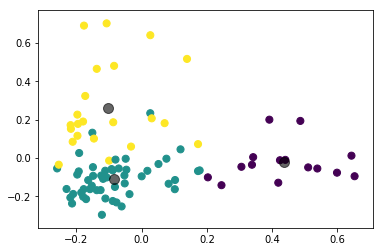

In [43]:
########### Swich to slides
#dividing the search space for bigger repos
# we will use the TFIDF's vectors as an exampe and with go with k=3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(train['tfidf'].tolist())
#getting cluster labels
labels = kmeans.labels_.tolist()
#plotting vectors
plt.scatter([x[0] for x in train['tfidf'].tolist()], [x[1] for x in train['tfidf'].tolist()], c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.6);

In [44]:
train['cluster']=labels
train.head()

/Users/a66as/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,text,target,textp,tfidf,d2v,cluster
ID,,,,,,
LOG4J2-485,"During analysis of LOG4J2-471, I found the sam...",471,analysis log4j2 471 find issue happen asyncapp...,"[0.026305490847767562, 0.2335605531221865, -0....","[0.18958262, 0.38284105, -0.19674218, 0.319937...",1
LOG4J2-702,"This is in trunk, svn commit 1608156\n\nLogger...",1121,trunk svn commit 1608156 loggerconfig#waitforc...,"[-0.052886349520689685, -0.09038890642003798, ...","[0.040228926, 0.5206167, -0.3405005, -0.093277...",1
LOG4J2-755,"{code}\n<RollingFile name=""MyFile"" filename=""$...",829,"{ code } < rollingfile name=""myfile filename=""...","[-0.08457003441247987, 0.48030702890869975, 0....","[0.21353906, 0.31685328, 0.024574252, 0.248174...",2
LOG4J2-519,Please try out the attached [^Generate.java] t...,41,try attach [ ^generate.java ] tool provide fun...,"[-0.051965305427135226, -0.13237186936871176, ...","[-0.09763628, -0.43564945, 0.38103268, 0.06422...",1
LOG4J2-1292,"LOG4J2-1274 added the {{encode(LogEvent, ByteB...",1274,log4j2 1274 add { { encode(logevent bytebuffer...,"[-0.2592607907173985, -0.05429934291000345, 0....","[0.4263881, 0.14686464, -0.20516132, -0.060911...",1


In [45]:
#infering cluster for test set
test_labels=kmeans.predict(test['tfidf'].tolist()) # predicting clusters for test data
test['cluster']=test_labels
test.head()

/Users/a66as/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/a66as/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/a66as/anaconda3/lib/python3.7/site-packag

,text,target,textp,tfidf,d2v,cluster
ID,,,,,,
LOG4J2-1867,Was following the link:\n\nhttp://logging.apac...,1952,follow link http://logging.apache.org/log4j/2....,"[0.06808527395529694, 0.2534705522877221, -0.0...","[0.8465534, -0.37812433, 0.13828842, 0.0570552...",2
LOG4J2-1629,For some applications like financial trading s...,1660,application like financial trading highly inte...,"[-0.12671136726193294, -0.11846943622162363, -...","[0.6138886, -0.009546127, -0.35665384, 0.02053...",1
LOG4J2-359,I have Weblogic 12c running. My web-app is ver...,293,weblogic 12c run web app version 2.5 follow sn...,"[0.2596196374982688, 0.16086508114382578, -0.1...","[0.98680633, -0.0091645615, 0.31752288, -0.571...",0
LOG4J2-1590,AbstractFilter should call vararg method from ...,1511,abstractfilter vararg method method unroll par...,"[-0.10085560908990242, -0.12792506903001175, 0...","[0.25306782, 0.06335757, -0.22746737, -0.10926...",1
LOG4J2-1349,The current ThreadContext map and stack implem...,1516,current threadcontext map stack implementation...,"[-0.11588128003073407, -0.22571925365946638, -...","[0.44793233, 0.10766905, 0.039360233, -0.36491...",1


In [46]:
#recommender using TFIDF vectors with k-means
from scipy.spatial import distance
def rec_exist(rec, str3):
    if len(rec)==0:
        return False
    else:
        for item in rec:
            #print("STU",str(item[0]), str3,"STU")
            if str(item[1]) == str3:
                return item[2]
        return False
def rec_delete(rec, str4):
    if len(rec)==0:
        return False
    else:
        for item in rec:
            #print("STU",str(item[0]), str3,"STU")
            if str(item[1]) == str4:
                rec.remove(item)
                return True
        return False
# The YxX TFIDF recommender
reuse_data=[]
for row in test.iterrows():
    print(row[0], "-->", row[1][1])
    rec=[]
    for subrow in train.loc[train['cluster'] == row[1][5]].iterrows():
        if distance.cosine(row[1][3], subrow[1][3]) <0.80:
            #print("|_Similar Case:",subrow[0],"is using",subrow[1][1],"with TFIDF-Cosine",round(distance.cosine(row[1][3], subrow[1][3]),2))
            rec_exist_call= rec_exist(rec, str(subrow[1][1]))
            if rec_exist_call==False:
                rec.append([subrow[0], subrow[1][1],distance.cosine(row[1][3], subrow[1][3])])
            elif rec_exist_call>distance.cosine(row[1][3], subrow[1][3]):
                rec_delete(rec, subrow[1][1])
                rec.append([subrow[0], subrow[1][1],distance.cosine(row[1][3], subrow[1][3])])
    rec.sort(key=lambda x: x[2])
    reuse_data.append([row[0],row[1][1], rec])
    #print(rec)

LOG4J2-1867 --> 1952
LOG4J2-1629 --> 1660
LOG4J2-359 --> 293
LOG4J2-1590 --> 1511
LOG4J2-1349 --> 1516
LOG4J2-1567 --> 1511
LOG4J2-511 --> 392
LOG4J2-1176 --> 578
LOG4J2-1547 --> 1539
LOG4J2-1660 --> 1637


In [47]:
#accuracy based on if the ground truth is in recommended list
top4=0
ex_match=0
for obj in reuse_data:
    print(obj[0],"-->",obj[1])
    if len(obj[2])>0:
        #print(obj[2])
        if obj[2][0][1]==obj[1]:
            ex_match+=1
    count=0
    for recomendation in obj[2]:
        count+=1
        print("|__ case:", recomendation[0],"uses", recomendation[1], "TF-Cosine", round(recomendation[2],3))
        if recomendation[1]==obj[1] and count<5:
            top4+=1

LOG4J2-1867 --> 1952
|__ case: LOG4J2-656 uses 435 TF-Cosine 0.283
|__ case: LOG4J2-672 uses 392 TF-Cosine 0.327
|__ case: LOG4J2-357 uses 293 TF-Cosine 0.66
|__ case: LOG4J2-457 uses 442 TF-Cosine 0.778
LOG4J2-1629 --> 1660
|__ case: LOG4J2-1447 uses 1516 TF-Cosine 0.157
|__ case: LOG4J2-1305 uses 1397 TF-Cosine 0.568
|__ case: LOG4J2-1401 uses 1010 TF-Cosine 0.632
|__ case: LOG4J2-1434 uses 1125 TF-Cosine 0.735
|__ case: LOG4J2-425 uses 323 TF-Cosine 0.751
|__ case: LOG4J2-519 uses 41 TF-Cosine 0.793
LOG4J2-359 --> 293
|__ case: LOG4J2-245 uses 250 TF-Cosine 0.429
|__ case: LOG4J2-1747 uses 1637 TF-Cosine 0.457
|__ case: LOG4J2-713 uses 703 TF-Cosine 0.603
|__ case: LOG4J2-1081 uses 920 TF-Cosine 0.604
|__ case: LOG4J2-638 uses 539 TF-Cosine 0.677
|__ case: LOG4J2-529 uses 578 TF-Cosine 0.732
|__ case: LOG4J2-1159 uses 323 TF-Cosine 0.761
LOG4J2-1590 --> 1511
|__ case: LOG4J2-16 uses 41 TF-Cosine 0.486
|__ case: LOG4J2-1401 uses 1010 TF-Cosine 0.546
|__ case: LOG4J2-1292 uses 1274 TF

In [48]:
print("Exact Matches",100*(ex_match/len(test)),"%.")
print("Top-4 Accuracy", 100*(top4/len(test)),"%.")

Exact Matches 10.0 %.
Top-4 Accuracy 30.0 %.
